In [19]:
import numpy as np
import time
import nltk
import xgboost as xgb
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading data

In [20]:
data = load_dataset("rotten_tomatoes")

Using custom data configuration default
Reusing dataset rotten_tomatoes (C:\Users\38599\.cache\huggingface\datasets\rotten_tomatoes\default\1.0.0\40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


  0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
label_names = data["train"].features['label'].names
label_names

['neg', 'pos']

In [22]:
data.set_format(type="pandas")
train = data['train'][:]
test = data['test'][:]

## Feature extraction

In [23]:
stop_words = stopwords.words("english")
def perform_feature_extraction(vectorizer, train_docs, test_docs, **args):
    start_time = time.time()
    
    vect = vectorizer(stop_words=stop_words, **args)
    vect_train = vect.fit_transform(train_docs)
    
    end_train_time = time.time()
    vect_test = vect.transform(test_docs)
    end_test_time = time.time()
    
    train_fe_time = end_train_time - start_time
    test_fe_time = end_test_time - end_train_time
    
    return vect_train, vect_test, train_fe_time, test_fe_time

In [24]:
tfidf = perform_feature_extraction(TfidfVectorizer, train['text'], test['text'])
bow = perform_feature_extraction(CountVectorizer, train['text'], test['text'])
ngram = perform_feature_extraction(TfidfVectorizer, train['text'], test['text'], ngram_range=(1,2))
features = [tfidf, bow, ngram]
ft_names = ["TF-IDF", "BoW", "N-gram"]

## Classification

In [25]:
classifiers = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(n_jobs=-1, random_state=0), xgb.XGBClassifier(n_jobs=-1, random_state=0)]
classifier_names = [ "Decision Tree", "Random Forest", "XGBoost"]

In [26]:
def plot_confusion_matrix(y_true,y_preds, labels=None):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".4f", ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.show()

TF-IDF
Decision Tree
classification report
              precision    recall  f1-score   support

         neg     0.6415    0.6548    0.6481       533
         pos     0.6475    0.6341    0.6408       533

    accuracy                         0.6445      1066
   macro avg     0.6445    0.6445    0.6444      1066
weighted avg     0.6445    0.6445    0.6444      1066

Feature extraction fit time: 0.16749215126037598
Train time: 1.875171184539795
Total train time: 2.042663335800171
Feature extraction transform time: 0.017002344131469727
Test time: 0.0
Total test time: 0.017002344131469727


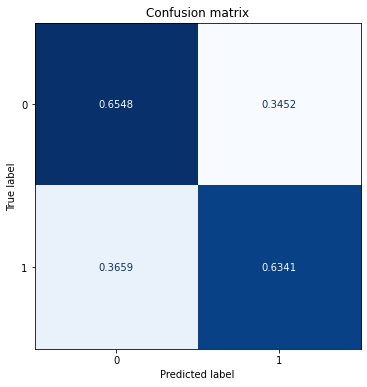


Random Forest
classification report
              precision    recall  f1-score   support

         neg     0.6944    0.7842    0.7366       533
         pos     0.7522    0.6548    0.7001       533

    accuracy                         0.7195      1066
   macro avg     0.7233    0.7195    0.7183      1066
weighted avg     0.7233    0.7195    0.7183      1066

Feature extraction fit time: 0.16749215126037598
Train time: 1.2430310249328613
Total train time: 1.4105231761932373
Feature extraction transform time: 0.017002344131469727
Test time: 0.04180145263671875
Total test time: 0.05880379676818848


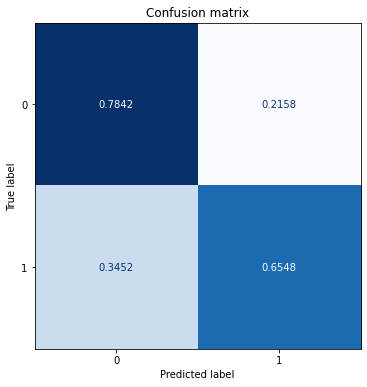


XGBoost
classification report
              precision    recall  f1-score   support

         neg     0.6839    0.7674    0.7233       533
         pos     0.7350    0.6454    0.6873       533

    accuracy                         0.7064      1066
   macro avg     0.7095    0.7064    0.7053      1066
weighted avg     0.7095    0.7064    0.7053      1066

Feature extraction fit time: 0.16749215126037598
Train time: 0.7849974632263184
Total train time: 0.9524896144866943
Feature extraction transform time: 0.017002344131469727
Test time: 0.01100015640258789
Total test time: 0.028002500534057617


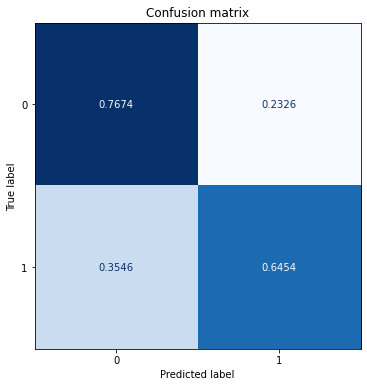


BoW
Decision Tree
classification report
              precision    recall  f1-score   support

         neg     0.6543    0.6923    0.6727       533
         pos     0.6733    0.6341    0.6531       533

    accuracy                         0.6632      1066
   macro avg     0.6638    0.6632    0.6629      1066
weighted avg     0.6638    0.6632    0.6629      1066

Feature extraction fit time: 0.14484667778015137
Train time: 1.510714054107666
Total train time: 1.6555607318878174
Feature extraction transform time: 0.012294530868530273
Test time: 0.0
Total test time: 0.012294530868530273


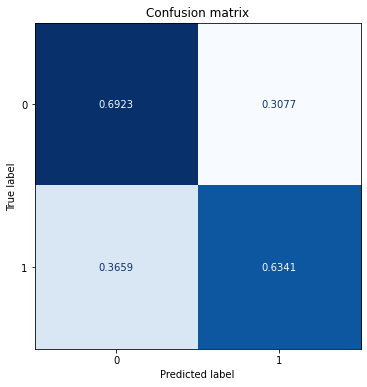


Random Forest
classification report
              precision    recall  f1-score   support

         neg     0.7066    0.7636    0.7340       533
         pos     0.7429    0.6829    0.7116       533

    accuracy                         0.7233      1066
   macro avg     0.7247    0.7233    0.7228      1066
weighted avg     0.7247    0.7233    0.7228      1066

Feature extraction fit time: 0.14484667778015137
Train time: 1.305818796157837
Total train time: 1.4506654739379883
Feature extraction transform time: 0.012294530868530273
Test time: 0.05499839782714844
Total test time: 0.06729292869567871


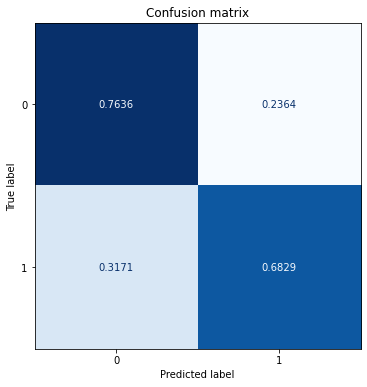


XGBoost
classification report
              precision    recall  f1-score   support

         neg     0.6943    0.7542    0.7230       533
         pos     0.7310    0.6679    0.6980       533

    accuracy                         0.7111      1066
   macro avg     0.7127    0.7111    0.7105      1066
weighted avg     0.7127    0.7111    0.7105      1066

Feature extraction fit time: 0.14484667778015137
Train time: 0.39957737922668457
Total train time: 0.5444240570068359
Feature extraction transform time: 0.012294530868530273
Test time: 0.011002302169799805
Total test time: 0.023296833038330078


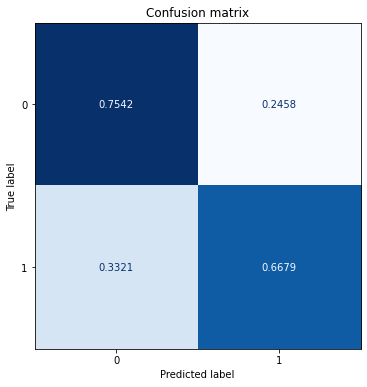


N-gram
Decision Tree
classification report
              precision    recall  f1-score   support

         neg     0.6496    0.6886    0.6685       533
         pos     0.6687    0.6285    0.6480       533

    accuracy                         0.6585      1066
   macro avg     0.6591    0.6585    0.6582      1066
weighted avg     0.6591    0.6585    0.6582      1066

Feature extraction fit time: 0.4097774028778076
Train time: 5.243876695632935
Total train time: 5.653654098510742
Feature extraction transform time: 0.030635356903076172
Test time: 0.0
Total test time: 0.030635356903076172


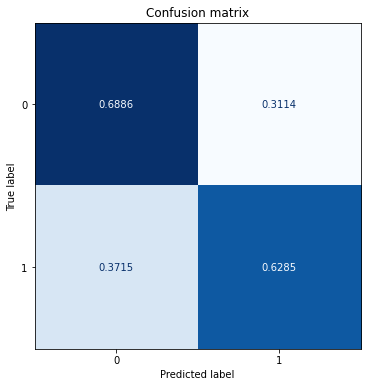


Random Forest
classification report
              precision    recall  f1-score   support

         neg     0.7080    0.7824    0.7433       533
         pos     0.7568    0.6773    0.7149       533

    accuracy                         0.7298      1066
   macro avg     0.7324    0.7298    0.7291      1066
weighted avg     0.7324    0.7298    0.7291      1066

Feature extraction fit time: 0.4097774028778076
Train time: 5.5014729499816895
Total train time: 5.911250352859497
Feature extraction transform time: 0.030635356903076172
Test time: 0.05142807960510254
Total test time: 0.08206343650817871


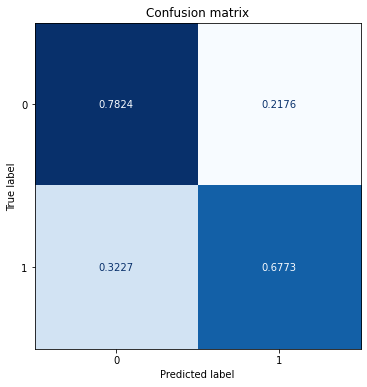


XGBoost
classification report
              precision    recall  f1-score   support

         neg     0.6789    0.7617    0.7179       533
         pos     0.7286    0.6398    0.6813       533

    accuracy                         0.7008      1066
   macro avg     0.7038    0.7008    0.6996      1066
weighted avg     0.7038    0.7008    0.6996      1066

Feature extraction fit time: 0.4097774028778076
Train time: 1.321141004562378
Total train time: 1.7309184074401855
Feature extraction transform time: 0.030635356903076172
Test time: 0.03641462326049805
Total test time: 0.06704998016357422


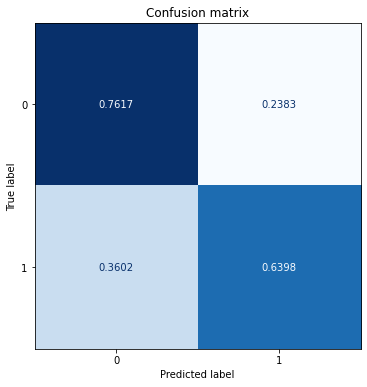

In [27]:
for i, feat in enumerate(features):
    X_train = feat[0]
    y_train = train['label']
    train_fe_time = feat[2]
    
    X_test = feat[1]
    y_test = test['label']
    test_fe_time = feat[3]
    
    print(ft_names[i])
    for j, clf in enumerate(classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        train_time = end_time - start_time
        
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        test_time = end_time - start_time
        
        print(classifier_names[j])
        print('classification report')
        print(classification_report(y_test, y_pred, target_names=label_names, digits=4))
        print(f"Feature extraction fit time: {train_fe_time}")
        print(f"Train time: {train_time}")
        print(f"Total train time: {train_time + train_fe_time}")
        print(f"Feature extraction transform time: {test_fe_time}")
        print(f"Test time: {test_time}")
        print(f"Total test time: {test_time + test_fe_time}")
        plot_confusion_matrix(y_test, y_pred)
        print()